In [1]:
import warnings
warnings.filterwarnings("ignore") 
import tensorflow
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import Sequence
import matplotlib.pyplot as plt
from pathlib import Path

2024-07-13 13:49:34.471232: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 13:49:34.471373: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 13:49:34.637043: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Image data generator 
train_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()

In [3]:
train_data = train_gen.flow_from_directory(
"/kaggle/input/faceshape-processed/dataset/train",
target_size = (48, 48),
batch_size = 64,
color_mode = "grayscale",
class_mode="categorical")

test_data = test_gen.flow_from_directory(
"/kaggle/input/faceshape-processed/dataset/test",
target_size = (48, 48),
batch_size = 64,
color_mode = "grayscale",
class_mode="categorical")

Found 3981 images belonging to 5 classes.
Found 998 images belonging to 5 classes.


In [4]:
class ValAccEarlyStop(tensorflow.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(ValAccEarlyStop, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

In [5]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, kernel_regularizer=l2(0.01), padding='same', activation='relu', input_shape=(48, 48, 1)),
    Conv2D(filters=32, kernel_size=3, kernel_regularizer=l2(0.01), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(filters=64, kernel_size=3, kernel_regularizer=l2(0.01), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=3, kernel_regularizer=l2(0.01), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(filters=64, kernel_size=3, kernel_regularizer=l2(0.01), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=3, kernel_regularizer=l2(0.01), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(5, activation='softmax')
])

cnn_model.summary()

cnn_model.compile(optimizer="adam", 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

history = cnn_model.fit(
    train_data,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=test_data,
    validation_steps=validation_steps,
    shuffle=True,
    callbacks=[ValAccEarlyStop(0.79)]
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,321,573 (5.04 MB)

 Trainable params: 1,321,573 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 54s 762ms/step - accuracy: 0.2022 - loss: 9.1579 - val_accuracy: 0.2021 - val_loss: 3.7619
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2344 - loss: 3.7601 - val_accuracy: 0.1316 - val_loss: 3.7570
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 26s 401ms/step - accuracy: 0.2060 - loss: 3.6511 - val_accuracy: 0.2125 - val_loss: 3.3939
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.2031 - loss: 3.3943 - val_accuracy: 0.1842 - val_loss: 3.3907
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 26s 398ms/step - accuracy: 0.1968 - loss: 3.3268 - val_accuracy: 0.2260 - val_loss: 3.1555
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1562 - loss: 3.1587 - val_accuracy: 0.3684 - val_loss: 3.1499
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 398ms/step - accuracy: 0.1999 - loss: 3.1060 - val_accuracy: 0.2073 - val_loss: 2.9761
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2500 - loss: 2.9777 - val_accuracy: 0.263

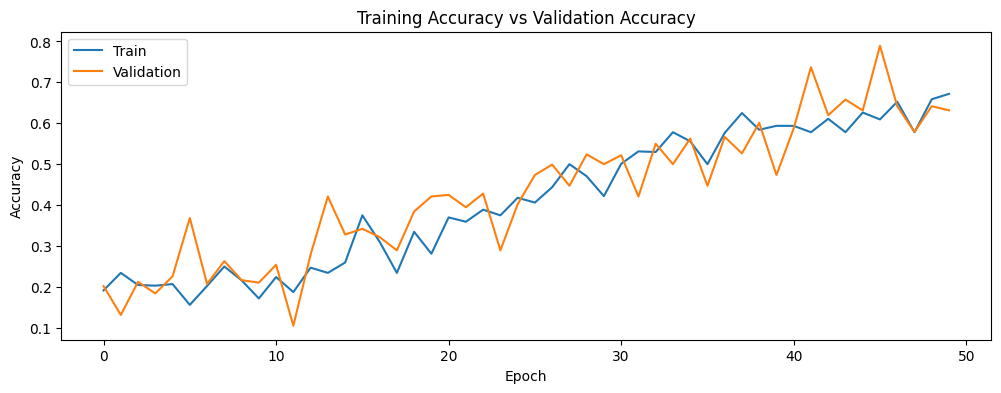

In [6]:
fig , ax = plt.subplots(1, 1)
train_acc = history.history['accuracy']
fig.set_size_inches(12,4)

ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.set_title('Training Accuracy vs Validation Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['Train','Validation'])

In [7]:
# Convert the model to JSON and save it to a file
model_structure = cnn_model.to_json()
path = Path("/kaggle/working/groveOn_model.json")
path.write_text(model_structure)

# Save the model
cnn_model.save('/kaggle/working/groveOn_model.h5')